In [1]:
import numpy as np
X = np.array([[1, 2], [1.5, 3], [3.5, 4], [4, 5], [6, 2], [7, 5], [9, 4], [8, 2]])
y = [0, 0, 0, 0, 1, 1, 1, 1]

In [2]:
from sklearn.svm import SVC
# 선형 svm 모형
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

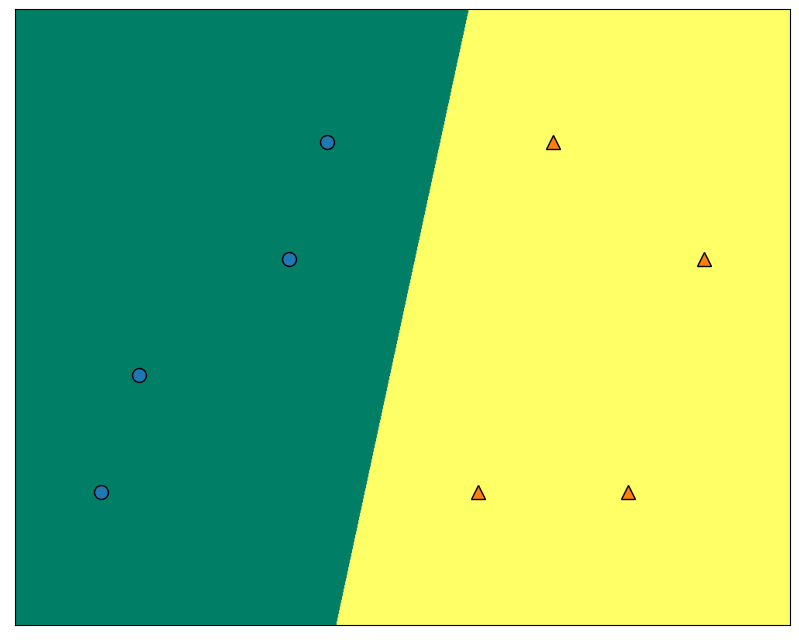

In [19]:
import mglearn
import matplotlib.pyplot as plt
plt.figure(figsize=[10, 8])
mglearn.plots.plot_2d_classification(model, X, cm='summer')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

[0]
[[4. 5.]
 [6. 2.]
 [7. 5.]]


array([3, 4, 5])

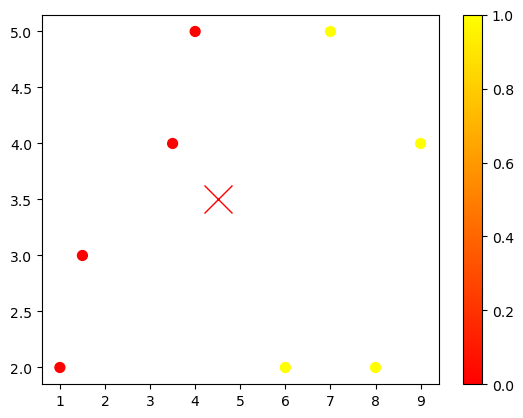

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# X 데이터는 어느 클래스로 분류될까?
plt.plot([4.5], [3.5], 'x', color='red', markersize=20)
plt.colorbar()
print(model.predict([[4.5, 3.5]]))

# 서포트 벡터 샘플
print(model.support_vectors_)

# 서포트 벡터의 인덱스
model.support_

In [17]:
def plot_svc(model, ax=None):
    if ax == None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 그래프 그리드
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # 정방행렬로 만들고
    xy = np.vstack([X.ravel(), Y.ravel()]).T # 1차원으로 만들고 행렬 전치
    # 판별함수에 입력하고
    P = model.decision_function(xy).reshape(X.shape)

    # decision boundary 와 margins
    # 등고선, 2차원 넘파이 배열
    ax.contour(X, Y, P,
               lavels=[-1, 0, 1],
               linestyles=['--', '-', '--'])
    # 서포트 벡터 출력
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=200)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12160\711776767.py:17: UserWarning: The following kwargs were not used by contour: 'lavels'
  ax.contour(X, Y, P,


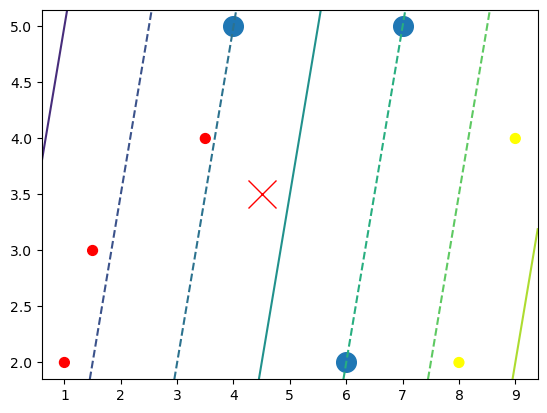

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([4.5], [3.5], 'x', color='red', markersize=20)
plot_svc(model)